In [1]:
from datetime import datetime
import os

import pandas as pd

from bluebikes_analysis.config import LOCAL_DATA_DIR

#### Load individual csv files

In [2]:
# Get base folder and csv filenames
csv_folder = LOCAL_DATA_DIR / "raw/trips"
trips_csv_list = [x for x in os.listdir(csv_folder) if x.endswith("csv")]

# Load all available csv
trips_df_dict = {}
for csv_file in trips_csv_list:
    df_i = pd.read_csv(csv_folder / csv_file)
    trips_df_dict[csv_file.replace('.csv', '')] = df_i

#### Initial exploration of dataset formats

In [3]:
# Get column sets
column_sets = {}
for name, df in trips_df_dict.items():
    col_tuple = tuple(sorted(df.columns))
    if col_tuple not in column_sets:
        column_sets[col_tuple] = []
    column_sets[col_tuple].append(name)

# Report
print(f"Found {len(column_sets)} different column schemas:")
for i, (cols, files) in enumerate(column_sets.items(), 1):
    print(f"\nSchema {i} ({len(files)} files):")
    print(f"  Columns: {cols}")
    print(f"  Files: {files[:3]}{'...' if len(files) > 3 else ''}")

Found 3 different column schemas:

Schema 1 (24 files):
  Columns: ('bikeid', 'birth year', 'end station id', 'end station latitude', 'end station longitude', 'end station name', 'gender', 'start station id', 'start station latitude', 'start station longitude', 'start station name', 'starttime', 'stoptime', 'tripduration', 'usertype')
  Files: ['201805-bluebikes-tripdata', '201806-bluebikes-tripdata', '201807-bluebikes-tripdata']...

Schema 2 (35 files):
  Columns: ('bikeid', 'end station id', 'end station latitude', 'end station longitude', 'end station name', 'postal code', 'start station id', 'start station latitude', 'start station longitude', 'start station name', 'starttime', 'stoptime', 'tripduration', 'usertype')
  Files: ['202005-bluebikes-tripdata', '202006-bluebikes-tripdata', '202007-bluebikes-tripdata']...

Schema 3 (34 files):
  Columns: ('end_lat', 'end_lng', 'end_station_id', 'end_station_name', 'ended_at', 'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'star

We have three different dataset formats. Explore one example of each.

In [4]:
trips_df_dict["201805-bluebikes-tripdata"].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1177,2018-05-01 00:01:32.4590,2018-05-01 00:21:10.0260,184,Sidney Research Campus/ Erie Street at Waverly,42.357753,-71.103934,189,Kendall T,42.362428,-71.084955,790,Subscriber,1994,1
1,733,2018-05-01 00:05:19.4970,2018-05-01 00:17:32.7190,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,1238,Subscriber,1993,2
2,437,2018-05-01 00:05:37.7590,2018-05-01 00:12:54.8300,54,Tremont St at West St,42.354979,-71.063348,6,Cambridge St at Joy St,42.361291,-71.065262,218,Subscriber,1993,1
3,730,2018-05-01 00:05:39.6780,2018-05-01 00:17:50.5880,54,Tremont St at West St,42.354979,-71.063348,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,1885,Subscriber,1992,1
4,411,2018-05-01 00:06:10.1590,2018-05-01 00:13:02.0490,54,Tremont St at West St,42.354979,-71.063348,6,Cambridge St at Joy St,42.361291,-71.065262,602,Customer,1969,0


In [5]:
trips_df_dict["202005-bluebikes-tripdata"].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,1577,2020-05-01 00:03:09.7400,2020-05-01 00:29:26.9630,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,3941,Customer,NaN
1,943,2020-05-01 00:04:13.1380,2020-05-01 00:19:56.3460,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,5,Northeastern University - North Parking Lot,42.341814,-71.090179,4469,Subscriber,02120
2,1521,2020-05-01 00:11:00.0640,2020-05-01 00:36:21.5300,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,344,Commonwealth Ave at Chiswick Rd,42.340246,-71.151688,3703,Subscriber,02135
3,891,2020-05-01 00:11:20.6610,2020-05-01 00:26:12.6180,205,Bowdoin St at Quincy St,42.307852,-71.065122,445,Geiger Gibson Community Health Center,42.318865,-71.045368,3726,Subscriber,02125
4,439,2020-05-01 00:28:07.6160,2020-05-01 00:35:27.2910,86,Brookline Village - Station Street at MBTA,42.332744,-71.116267,103,JFK Crossing at Harvard St. / Thorndike St.,42.346563,-71.128374,4862,Subscriber,02143


In [6]:
trips_df_dict["202304-bluebikes-tripdata"].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,Innovation Lab - 125 Western Ave at Batten Way,A32011,Soldiers Field Park - 111 Western Ave,A32006,42.363713,-71.124598,42.364263,-71.118276,member
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,Museum of Science,M32045,One Broadway / Kendall Sq at Main St / 3rd St,M32003,42.367690,-71.071163,42.362242,-71.083111,member
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,New Balance - 20 Guest St,D32001,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,42.357329,-71.146735,42.337417,-71.102861,casual
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,Museum of Science,M32045,Gore Street at Lambert Street,M32081,42.367690,-71.071163,42.373080,-71.086342,member
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,Museum of Science,M32045,Columbus Ave at W. Canton St,C32077,42.367690,-71.071163,42.344742,-71.076482,member


Map old column names to new schema

In [7]:
# Essential columns only
column_mapping = {
    # Timestamps
    "starttime": "started_at",
    "stoptime": "ended_at",
    # Station IDs (spatial aggregation)
    "start station id": "start_station_id",
    "end station id": "end_station_id",
    # Geographic infrastructure
    "start station latitude": "start_lat",
    "start station longitude": "start_lng",
    "end station latitude": "end_lat",
    "end station longitude": "end_lng",
    # User type (might be useful for segmentation)
    "usertype": "member_casual",
}

# Columns to keep (standardized names)
keep_columns = [
    "started_at",
    "ended_at",
    "start_station_id",
    "end_station_id",
    "start_lat",
    "start_lng",
    "end_lat",
    "end_lng",
    "member_casual",
    "rideable_type",  # Only in 2023+ data
]

# Standardize each dataframe
for name, df in trips_df_dict.items():
    # Rename
    df.rename(columns=column_mapping, inplace=True)

    # Keep only columns that exist in this df
    cols_to_keep = [c for c in keep_columns if c in df.columns]
    trips_df_dict[name] = df[cols_to_keep]

print("Sample from each schema:")
for name in list(trips_df_dict.keys())[:3]:
    print(f"\n{name}: {trips_df_dict[name].columns.tolist()}")

Sample from each schema:

201805-bluebikes-tripdata: ['started_at', 'ended_at', 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']

201806-bluebikes-tripdata: ['started_at', 'ended_at', 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']

201807-bluebikes-tripdata: ['started_at', 'ended_at', 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']


In [8]:
# Parse datetimes for each dataframe
for name, df in trips_df_dict.items():
    # Try parsing with different formats
    # Format 1: '2018-05-01 00:21:10.0260' (with microseconds)
    # Format 2: '2023-04-13 13:49:59' (without microseconds)
    
    df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
    df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
    
    trips_df_dict[name] = df

# Check for parsing errors
print("Datetime parsing check:")
for name, df in list(trips_df_dict.items())[:3]:
    null_starts = df['started_at'].isnull().sum()
    null_ends = df['ended_at'].isnull().sum()
    print(f"{name}: {null_starts} null starts, {null_ends} null ends")

# Concatenate all dataframes
all_trips = pd.concat(trips_df_dict.values(), ignore_index=True)

print(f"\nCombined dataset:")
print(f"  Shape: {all_trips.shape}")
print(f"  Columns: {all_trips.columns.tolist()}")
print(f"  Date range: {all_trips['started_at'].min()} to {all_trips['started_at'].max()}")
print(f"\nMissing data proportion:")
print(all_trips.isnull().mean())

Datetime parsing check:
201805-bluebikes-tripdata: 0 null starts, 0 null ends
201806-bluebikes-tripdata: 0 null starts, 0 null ends
201807-bluebikes-tripdata: 0 null starts, 0 null ends

Combined dataset:
  Shape: (26002113, 10)
  Columns: ['started_at', 'ended_at', 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'rideable_type']
  Date range: 2018-05-01 00:01:32.459000 to 2026-01-31 23:52:58.586000

Missing data proportion:
started_at          0.000000
ended_at            0.000000
start_station_id    0.000125
end_station_id      0.001322
start_lat           0.000000
start_lng           0.000000
end_lat             0.000911
end_lng             0.000911
member_casual       0.000000
rideable_type       0.510846
dtype: float64


We can safely drop records with missing station id

In [9]:
# Drop records with missing station id
filt = all_trips["start_station_id"].isna() | all_trips["end_station_id"].isna()
all_trips = all_trips.loc[~filt, :]

print(f"\nMissing data proportion:")
print(all_trips.isnull().mean())


Missing data proportion:
started_at          0.000000
ended_at            0.000000
start_station_id    0.000000
end_station_id      0.000000
start_lat           0.000000
start_lng           0.000000
end_lat             0.000000
end_lng             0.000000
member_casual       0.000000
rideable_type       0.511568
dtype: float64


#### Rideable type

We have almost half the dataset without rideable_type (either classic or ebike). Lets check what is the last appearance of NA values in that column.

In [10]:
filt = all_trips["rideable_type"].isna()
all_trips.loc[filt, :].sort_values(by="ended_at").tail(1)

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
13178581,2023-03-17 16:53:06.225,2023-04-06 08:37:56.334,554,379,42.339202,-71.090511,42.342549,-71.074214,Customer,NaN


We know that ebikes arrive in Boston on December 20, 2023 ([link](https://mass.streetsblog.org/2023/12/20/electric-bluebikes-have-arrived-in-boston)). Before that, all the bikes were classic, so we can safely asssign the correct rideable type to our NA values.

In [11]:
all_trips["rideable_type"].value_counts()

rideable_type
classic_bike     7091019
docked_bike      3014773
electric_bike    2576533
Name: count, dtype: int64

What is docked_bike??

In [12]:
filt = all_trips["rideable_type"] == "docked_bike"
all_trips.loc[filt, :].sort_values(by="ended_at")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
13469751,2023-04-01 00:05:33,2023-04-01 00:06:31,M32009,M32009,42.363465,-71.100573,42.363465,-71.100573,member,docked_bike
13405921,2023-04-01 00:00:16,2023-04-01 00:08:06,K32006,K32001,42.351547,-71.121262,42.341598,-71.123338,casual,docked_bike
13520911,2023-04-01 00:02:58,2023-04-01 00:09:12,B32062,C32001,42.339202,-71.090511,42.331184,-71.095171,member,docked_bike
13386614,2023-04-01 00:03:03,2023-04-01 00:09:23,B32015,B32013,42.343691,-71.102353,42.334629,-71.104079,member,docked_bike
13537905,2023-04-01 00:06:24,2023-04-01 00:10:39,M32009,M32030,42.363465,-71.100573,42.361780,-71.108100,member,docked_bike
...,...,...,...,...,...,...,...,...,...,...
16044971,2023-11-09 16:40:36,2023-12-02 15:11:17,M32006,N32001,42.358100,-71.093198,42.353890,-71.199437,casual,docked_bike
16147245,2023-11-07 15:42:36,2023-12-02 20:10:03,C32000,M32076,42.345392,-71.069616,42.357662,-71.108413,casual,docked_bike
16279162,2023-11-17 21:36:47,2023-12-03 10:01:56,C32017,B32034,42.335741,-71.038770,42.344651,-71.097325,casual,docked_bike
16074081,2023-11-28 18:13:52,2023-12-04 10:32:25,K32006,E32005,42.351547,-71.121262,42.310579,-71.107341,casual,docked_bike


Apparently it is the generic name assigned to the bicycles before the distinction between classic and ebikes, probably inherited from another cities' system with docked an undocked bikes availability. We can safely name them classic_bikes as well.

In [13]:
# ASsign 'classic_bike' value to either NA or 'docked_bike' values.
filt = (all_trips["rideable_type"] == "docked_bike") | (all_trips["rideable_type"].isna())
all_trips.loc[filt, "rideable_type"] = "classic_bike"

In [14]:
# Proportion of trips for each bike type
all_trips["rideable_type"].value_counts(normalize=True)

rideable_type
classic_bike     0.900771
electric_bike    0.099229
Name: proportion, dtype: float64

#### Station ID

In [15]:
all_trips["start_station_id"] = all_trips["start_station_id"].astype(str)
all_trips["end_station_id"] = all_trips["end_station_id"].astype(str)

Lets check the stations_id

In [16]:
trips_station_ids = list(set(all_trips["start_station_id"].unique()) | set(all_trips["end_station_id"].unique()))
len(trips_station_ids)

1143

Way off the number of stations we expected. Lets check stations metadata.

In [17]:
stations_csv = LOCAL_DATA_DIR / "raw/stations" / "station_information.csv"
stations_df = pd.read_csv(stations_csv)

In [18]:
stations_df

,station_id,legacy_id,name,short_name,lat,lon,capacity,region_id,region_name
0,829fa5a8-cc88-4ab2-9f34-b481aaa1612e,259,Washington St at Bowdoin St,C32042,42.299165,-71.073459,15,10.0,Boston
1,5d17f129-af8c-4f30-bc58-6a8279052772,543,American Legion Hwy at Hyde Park Ave,C32101,42.272654,-71.119904,19,10.0,Boston
2,a6d6d4b2-3666-43ad-a690-7f676bdcc3fd,542,Hyde Park Ave at Arlington St,C32100,42.262867,-71.121631,19,10.0,Boston
3,f834e75d-0de8-11e7-991c-3863bb43a7d0,129,Hayes Square - Vine St at Moulton St,D32026,42.377022,-71.056605,19,10.0,Boston
4,2113559364250874028,2113559364250874028,Washington St at Mina Way,D32077,42.352982,-71.173224,15,10.0,Boston
...,...,...,...,...,...,...,...,...,...
590,350e73e3-6f70-4b2d-87ab-24c8629e9a6a,350e73e3-6f70-4b2d-87ab-24c8629e9a6a,Talbot Ave T Station,C32110,42.292251,-71.077972,19,10.0,Boston
591,2029805507281123700,2029805507281123700,Pope John Paul II Park - Neponset Trail at Hal...,C23015,42.279774,-71.046085,19,10.0,Boston
592,36a8fbc8-6069-4a29-bbfd-63a2d019c9a5,415,Stuart St at Berkeley St,D32049,42.349544,-71.072421,19,10.0,Boston
593,5bc7cba9-f0b0-442d-932c-e8c7927d87ce,386,Sennott Park Broadway at Norfolk Street,M32063,42.368605,-71.099302,19,8.0,Cambridge


We have 595 stations, but three different ids for many of them (station_id - legacy_id - short_name)

In [19]:
metadata_station_ids = list(set(stations_df["station_id"].unique()) | set(stations_df["legacy_id"].unique()) | set(stations_df["short_name"].unique()))
len(metadata_station_ids)

1602

It is probably the we are using at least two of those columns. Lets check which of them.

In [20]:
filt_unknown_start_ids = ~all_trips["start_station_id"].isin(list(metadata_station_ids))
filt_unknown_end_ids = ~all_trips["end_station_id"].isin(list(metadata_station_ids))
all_trips.loc[filt_unknown_start_ids | filt_unknown_end_ids, :]

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
5,2018-05-01 00:06:25.245,2018-05-01 00:15:33.797,88,87,42.374035,-71.101427,42.366621,-71.114214,Subscriber,classic_bike
8,2018-05-01 00:09:10.849,2018-05-01 00:15:41.857,45,61,42.344681,-71.097853,42.348762,-71.082383,Subscriber,classic_bike
16,2018-05-01 00:37:25.562,2018-05-01 00:50:58.647,45,131,42.344681,-71.097853,42.322931,-71.100141,Subscriber,classic_bike
29,2018-05-01 01:27:30.207,2018-05-01 01:31:52.221,96,88,42.373379,-71.111075,42.374035,-71.101427,Subscriber,classic_bike
74,2018-05-01 05:58:54.141,2018-05-01 06:09:33.736,45,26,42.344681,-71.097853,42.341522,-71.068922,Subscriber,classic_bike
...,...,...,...,...,...,...,...,...,...,...
25974176,2026-01-01 09:43:00.969,2026-01-01 09:46:40.797,A32022,X32999,42.378965,-71.068607,42.387151,-71.075978,member,electric_bike
25983709,2026-01-15 14:53:26.358,2026-01-15 15:20:57.468,X32999,R32004,42.387151,-71.075978,42.441956,-71.014680,member,electric_bike
25998496,2026-01-06 15:00:50.969,2026-01-06 15:25:47.939,X32999,R32004,42.387151,-71.075978,42.441956,-71.014680,member,electric_bike
25998498,2026-01-14 14:59:51.692,2026-01-14 15:23:37.376,X32999,R32004,42.387151,-71.075978,42.441956,-71.014680,member,electric_bike


We have 770k rows with ids not included in our metadata columns

In [21]:
all_unknown_ids = list(
    set(all_trips.loc[filt_unknown_start_ids, :]["start_station_id"].unique())
    | set(all_trips.loc[filt_unknown_end_ids, :]["end_station_id"].unique())
)
len(all_unknown_ids)

136

136 unknown station ids!

Lets create a dataset with the id + lat + lon for the unknown stations

In [22]:
all_unknown_ids

['476',
 'V32010',
 '497',
 '88',
 '317',
 '238',
 '250',
 '262',
 '277',
 '582',
 '510',
 '540',
 '351',
 '585',
 '249',
 '237',
 '302',
 '388',
 '571',
 'X32999',
 'BCBS01',
 '590',
 '274',
 '299',
 '240',
 '382',
 '499',
 '451',
 'S32043',
 '284',
 '164',
 '278',
 '506',
 '229',
 '534',
 'B32066',
 'L32006',
 '246',
 '409',
 'X32001',
 '564',
 '537',
 '231',
 'S32045',
 '242',
 'D32022',
 '496',
 '256',
 '450',
 '283',
 '438',
 '592',
 '156',
 '263',
 '308',
 '573',
 '586',
 'M32028',
 'H32007',
 '244',
 'S32020',
 '396',
 '369',
 '583',
 'S32049',
 '311',
 '428',
 '230',
 '589',
 '254',
 '247',
 '570',
 '593',
 'T32013',
 '223',
 'BCBS02',
 '577',
 '253',
 '155',
 '587',
 '109',
 '565',
 '513',
 '293',
 '576',
 '574',
 'c32014',
 'C32097',
 '594',
 '90',
 '578',
 '591',
 '295',
 '220',
 'S32042',
 '252',
 '383',
 '563',
 '420',
 '457',
 'A32043',
 '306',
 '243',
 '411',
 '307',
 '158',
 '248',
 '568',
 '294',
 '352',
 '45',
 '575',
 'H32004',
 '470',
 '572',
 '257',
 '584',
 '245',

In [23]:
unknown_start_ids_ll = (
    all_trips.loc[filt_unknown_start_ids, ["start_station_id", "start_lat", "start_lng"]]
    .rename(columns={"start_station_id": "id", "start_lat": "lat", "start_lng": "lng"})
)
unknown_end_ids_ll = all_trips.loc[
    filt_unknown_end_ids, ["end_station_id", "end_lat", "end_lng"]
].rename(columns={"end_station_id": "id", "end_lat": "lat", "end_lng": "lng"})

unknown_stations = pd.concat([unknown_start_ids_ll, unknown_end_ids_ll])

In [24]:
unknown_stations["id"].value_counts().head(70)

id
90        125741
352        73959
369        65382
S32039     59202
409        44167
           ...  
264         1109
570         1069
250         1022
513         1009
308          935
Name: count, Length: 70, dtype: int64

For 69/136 ids we have 1000 trips or more

In [25]:
unknown_stations["id"].value_counts().tail(21)

id
248       100
311        96
253        89
245        78
438        73
254        72
274        59
574        56
589        42
306        31
BCBS02     19
B32066     16
594        14
223         9
229         5
158         4
382         3
230         3
383         1
X32001      1
164         1
Name: count, dtype: int64

For 21/136 ids we have 100 trips or less

In [26]:
unknown_stations = (
    unknown_stations
    .groupby(['id', 'lat', 'lng'], dropna=False)
    .size()
    .reset_index(name='count')
)

In [27]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Center map on data centroid
center_lat = unknown_stations["lat"].mean()
center_lng = unknown_stations["lng"].mean()

# Create map
m = folium.Map(location=[center_lat, center_lng], zoom_start=12)

# Normalize counts for color mapping with log scale
norm = colors.LogNorm(vmin=unknown_stations["count"].min(), 
                      vmax=unknown_stations["count"].max())

# Truncate colormap to use only mid-to-dark range (0.3 to 1.0)
cmap = cm.get_cmap('PuRd')
cmap_truncated = colors.LinearSegmentedColormap.from_list(
    'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0.5, b=1.0),
    cmap(np.linspace(0.5, 1.0, 100))
)

# Add markers
for _, row in unknown_stations.iterrows():
    color_value = cmap_truncated(norm(row["count"]))
    color_hex = colors.rgb2hex(color_value)

    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=5,
        popup=f"ID: {row['id']}<br>Count: {row['count']}",
        color=color_hex,
        fill=True,
        fillColor=color_hex,
        fillOpacity=0.7,
    ).add_to(m)

m.save("unknown_stations.html")

C:\Users\usuario\AppData\Local\Temp\ipykernel_2404\2646842212.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('PuRd')


Findings:

In [28]:
def get_first_last(station_id):
    filt = (all_trips["start_station_id"] == station_id) | (
        all_trips["end_station_id"] == station_id
    )
    df = pd.concat(
        [
            all_trips.loc[filt, :].sort_values(by="ended_at").head(1),
            all_trips.loc[filt, :].sort_values(by="ended_at").tail(1),
        ]
    )

    return df

---

Some of the ids are from stations that dont exist anymore. For example:

ID 45 (Jersey Street @ Boylston, Fenway) seen using google street view.

In [29]:
get_first_last("45")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
8,2018-05-01 00:09:10.849,2018-05-01 00:15:41.857,45,61,42.344681,-71.097853,42.348762,-71.082383,Subscriber,classic_bike
1367084,2018-11-14 09:40:04.273,2018-11-14 09:44:37.806,33,45,42.348706,-71.097009,42.344681,-71.097853,Subscriber,classic_bike


Last trip on 2018

---

Some ids corresponds to stations that were logged with a wrong number, and then were corrected. For example:

ID c32014 appears for around a month before being corrected to id C32069 (note no overlap between both stations and matching lat lon).

In [30]:
get_first_last("c32014")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
19006911,2024-08-06 15:19:48.728,2024-08-06 15:25:59.956,C32035,c32014,42.343749,-71.062256,42.332482,-71.054241,casual,electric_bike
19531361,2024-09-18 14:10:41.464,2024-09-18 14:29:02.669,c32014,D32019,42.332482,-71.054241,42.352409,-71.062679,member,classic_bike


In [31]:
get_first_last("C32069")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
19981557,2024-09-18 16:21:53.251,2024-09-18 16:33:21.292,C32034,C32069,42.351586,-71.045693,42.332482,-71.054241,member,classic_bike
25952248,2026-01-31 16:08:15.262,2026-01-31 16:14:30.942,C32013,C32069,42.320340,-71.051180,42.332482,-71.054241,member,classic_bike


Another example:

In [32]:
get_first_last("D32022")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
13341476,2023-04-01 14:24:40.000,2023-04-01 14:39:46.000,D32022,M32045,42.365908,-71.064467,42.367690,-71.071163,casual,classic_bike
22047971,2025-04-28 08:44:44.710,2025-04-28 08:55:43.826,D32022,C32021,42.365908,-71.064467,42.344796,-71.031614,member,electric_bike


In [33]:
get_first_last("A32021")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
21904425,2025-04-28 15:07:38.491,2025-04-28 15:31:35.519,D32030,A32021,42.354968,-71.060977,42.365858,-71.064157,member,classic_bike
25944783,2026-01-31 22:45:16.954,2026-01-31 23:32:45.126,A32053,A32021,42.364739,-71.059349,42.365858,-71.064157,member,electric_bike


---

For some others, there is no explanation. Maybe a temporary station to validate usage? For example:

ID 453

In [34]:
get_first_last("453")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
4768712,2020-07-02 16:09:36.201,2020-07-02 16:12:48.742,452,453,42.343731,-71.116141,42.344968,-71.110402,Subscriber,classic_bike
5744747,2020-10-15 10:31:31.926,2020-10-15 11:03:18.756,453,60,42.344968,-71.110402,42.360793,-71.071190,Subscriber,classic_bike


---

Some others are located in odd places. Might they be warehouses??

In [35]:
[x for x in all_unknown_ids if x.startswith("X")]

['X32999', 'X32001']

In [36]:
get_first_last("X32001")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
25772253,2025-12-06 15:07:07.129,2025-12-06 15:18:18.094,X32001,S32013,42.386455,-71.07542,42.397783,-71.10594,member,electric_bike
25772253,2025-12-06 15:07:07.129,2025-12-06 15:18:18.094,X32001,S32013,42.386455,-71.07542,42.397783,-71.10594,member,electric_bike


In [37]:
get_first_last("X32999")

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
13367600,2023-04-01 21:07:22.000,2023-04-02 18:01:40.000,E32010,X32999,42.300923,-71.114249,42.387151,-71.075978,casual,classic_bike
25858546,2026-01-30 23:23:19.600,2026-01-30 23:41:03.932,X32999,M32014,42.387151,-71.075978,42.366621,-71.114214,member,electric_bike


In [38]:
X_stations_ids = [x for x in all_unknown_ids if x.startswith("X")]

filt_unknown_start_ids = all_trips["start_station_id"].isin(X_stations_ids)
filt_unknown_end_ids = all_trips["end_station_id"].isin(X_stations_ids)
unknown_trips_X = all_trips.loc[filt_unknown_start_ids | filt_unknown_end_ids, :].copy()
unknown_trips_X['year'] = unknown_trips_X['ended_at'].dt.year
unknown_trips_X.groupby('year').size()

year
2023    756
2024    450
2025    853
2026     69
dtype: int64

These trips really look like service trips

In [39]:
unknown_trips_X["rideable_type"].value_counts()

rideable_type
classic_bike     1104
electric_bike    1024
Name: count, dtype: int64

In [40]:
unknown_trips_X.sort_values(by="started_at").reset_index(drop=True).tail(1000)["rideable_type"].value_counts()

rideable_type
electric_bike    784
classic_bike     216
Name: count, dtype: int64

Out of last 1000 bikes for that kind of trip, 78% corresponds to e-bikes. Seems like maintainance trips (ebikes break more often)

---

Decision

What is the meaning for our project???

In [41]:
filt_unknown_start_ids = ~all_trips["start_station_id"].isin(list(metadata_station_ids))
filt_unknown_end_ids = ~all_trips["end_station_id"].isin(list(metadata_station_ids))
unknown_trips = all_trips.loc[filt_unknown_start_ids | filt_unknown_end_ids, :].copy()
unknown_trips['year'] = unknown_trips['ended_at'].dt.year
unknown_trips.groupby('year').size()

year
2018    135644
2019    147250
2020    102330
2021    103100
2022    125827
2023     76307
2024     55600
2025     27091
2026        69
dtype: int64

Since 2023 to date, the number of trips using an unknown station id has been decreasing.

We are working with two time series:

- global time series from 2018 to date
- per station time series from 2023 to date

So we dont really care if there were some stations that were removed for the global counts.

We do care about unknown station happening from 2023 to date, for sure.

We do care detecting maintainance trips as opposed to user trips. Those were supposedly removed from the dataset, but we should be careful since we can probably find more of those.

During january we only have 69 trips including an unknown station_id. Those are the same detected as maintainance trips previously (stations starting with X). Lets check the number of unknown ids just for the period 2023-2026. Luckily we will have much lower number than the 136 found previously.

In [42]:
filt = all_trips["started_at"] >= datetime(year=2023, month=1, day=1)
trips_post_2023 = all_trips.loc[filt, :]

filt_unknown_start_ids = ~trips_post_2023["start_station_id"].isin(list(metadata_station_ids))
filt_unknown_end_ids = ~trips_post_2023["end_station_id"].isin(list(metadata_station_ids))
trips_post_2023.loc[filt_unknown_start_ids | filt_unknown_end_ids, :]

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
12790785,2023-01-01 00:38:05.484,2023-01-01 01:09:07.497,47,569,42.362811,-71.056067,42.380045,-71.073046,Customer,classic_bike
12790855,2023-01-01 01:08:45.234,2023-01-01 01:21:41.334,76,591,42.366426,-71.105495,42.383227,-71.106069,Subscriber,classic_bike
12790856,2023-01-01 01:09:04.333,2023-01-01 01:21:33.980,76,591,42.366426,-71.105495,42.383227,-71.106069,Subscriber,classic_bike
12790863,2023-01-01 01:11:58.581,2023-01-01 01:21:02.266,328,496,42.396387,-71.120113,42.398444,-71.107833,Customer,classic_bike
12790865,2023-01-01 01:12:28.765,2023-01-01 01:21:12.533,328,496,42.396387,-71.120113,42.398444,-71.107833,Customer,classic_bike
...,...,...,...,...,...,...,...,...,...,...
25974176,2026-01-01 09:43:00.969,2026-01-01 09:46:40.797,A32022,X32999,42.378965,-71.068607,42.387151,-71.075978,member,electric_bike
25983709,2026-01-15 14:53:26.358,2026-01-15 15:20:57.468,X32999,R32004,42.387151,-71.075978,42.441956,-71.014680,member,electric_bike
25998496,2026-01-06 15:00:50.969,2026-01-06 15:25:47.939,X32999,R32004,42.387151,-71.075978,42.441956,-71.014680,member,electric_bike
25998498,2026-01-14 14:59:51.692,2026-01-14 15:23:37.376,X32999,R32004,42.387151,-71.075978,42.441956,-71.014680,member,electric_bike


We have 159k rows with ids not included in our metadata columns (post 2023)

In [43]:
all_unknown_ids = list(
    set(trips_post_2023.loc[filt_unknown_start_ids, :]["start_station_id"].unique())
    | set(trips_post_2023.loc[filt_unknown_end_ids, :]["end_station_id"].unique())
)
len(all_unknown_ids)

64

Still 64 unknown stations. Not depicable number. The change in the system happened in april 2023. Might it be the case that the majority of unknown ids belong to the previous dataset schema?

In [44]:
filt = all_trips["started_at"] >= datetime(year=2023, month=4, day=1)
trips_post_2023 = all_trips.loc[filt, :].sort_values(by="started_at").reset_index(drop=True)

filt_unknown_start_ids = ~trips_post_2023["start_station_id"].isin(list(metadata_station_ids))
filt_unknown_end_ids = ~trips_post_2023["end_station_id"].isin(list(metadata_station_ids))
trips_post_2023.loc[filt_unknown_start_ids | filt_unknown_end_ids, :]

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type
172,2023-04-01 01:59:45.000,2023-04-01 02:09:40.000,S32008,S32020,42.400877,-71.116772,42.390446,-71.108566,casual,classic_bike
175,2023-04-01 02:00:09.000,2023-04-01 02:09:28.000,S32008,S32020,42.400877,-71.116772,42.390446,-71.108566,casual,classic_bike
242,2023-04-01 02:33:09.000,2023-04-01 02:47:36.000,S32039,M32018,42.389524,-71.116941,42.373268,-71.118579,member,classic_bike
244,2023-04-01 02:33:30.000,2023-04-01 02:47:35.000,S32039,M32018,42.389524,-71.116941,42.373268,-71.118579,member,classic_bike
254,2023-04-01 02:44:03.000,2023-04-01 03:11:46.000,M32055,S32020,42.365994,-71.095222,42.390446,-71.108566,member,classic_bike
...,...,...,...,...,...,...,...,...,...,...
12666413,2026-01-24 18:56:37.159,2026-01-24 19:00:12.731,X32999,A32022,42.387151,-71.075978,42.378965,-71.068607,member,electric_bike
12667004,2026-01-25 06:42:38.515,2026-01-25 06:47:27.301,A32022,X32999,42.378965,-71.068607,42.387151,-71.075978,member,electric_bike
12670008,2026-01-27 23:33:47.996,2026-01-27 23:43:24.685,X32999,X32999,42.387151,-71.075978,42.387151,-71.075978,member,electric_bike
12676854,2026-01-29 23:30:05.955,2026-01-29 23:48:13.615,X32999,M32014,42.387151,-71.075978,42.366621,-71.114214,member,electric_bike


In [45]:
all_unknown_ids = list(
    set(trips_post_2023.loc[filt_unknown_start_ids, :]["start_station_id"].unique())
    | set(trips_post_2023.loc[filt_unknown_end_ids, :]["end_station_id"].unique())
)
len(all_unknown_ids)

23

Effectively, the number of unknown ids after april 2023 is just 23 (2 of them we already checked as part of those that starts with 'X').

For the individual stations time series we can direcly focus on data from april 2023. We will be able to perform forecasting 3 years later this april 2026.

In [46]:
all_unknown_ids

['V32010',
 'S32043',
 'T32013',
 'B32066',
 'L32006',
 'H32004',
 'BCBS02',
 'X32001',
 'S32045',
 'D32022',
 'R32001',
 'S32039',
 'S32051',
 'c32014',
 'C32097',
 'M32028',
 'H32007',
 'S32042',
 'X32999',
 'BCBS01',
 'S32020',
 'A32043',
 'S32049']

---

Lets redo all our analysis from april 2023 onwards:

In [47]:
unknown_start_ids_ll = (
    trips_post_2023.loc[filt_unknown_start_ids, ["start_station_id", "start_lat", "start_lng"]]
    .rename(columns={"start_station_id": "id", "start_lat": "lat", "start_lng": "lng"})
)
unknown_end_ids_ll = trips_post_2023.loc[
    filt_unknown_end_ids, ["end_station_id", "end_lat", "end_lng"]
].rename(columns={"end_station_id": "id", "end_lat": "lat", "end_lng": "lng"})

unknown_stations = pd.concat([unknown_start_ids_ll, unknown_end_ids_ll])

In [48]:
unknown_stations["id"].value_counts()

id
S32039    59202
D32022    29284
A32043    16569
S32020     5984
R32001     3594
S32043     3175
L32006     2904
S32049     2320
X32999     2268
S32045     1880
c32014     1867
H32007     1115
V32010      682
H32004      599
T32013      568
S32042      489
M32028      405
S32051      309
C32097      262
BCBS01      254
BCBS02       19
B32066       16
X32001        1
Name: count, dtype: int64

In [49]:
unknown_stations = (
    unknown_stations
    .groupby(['id', 'lat', 'lng'], dropna=False)
    .size()
    .reset_index(name='count')
)

In [50]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Center map on data centroid
center_lat = unknown_stations["lat"].mean()
center_lng = unknown_stations["lng"].mean()

# Create map
m = folium.Map(location=[center_lat, center_lng], zoom_start=12)

# Normalize counts for color mapping with log scale
norm = colors.LogNorm(vmin=unknown_stations["count"].min(), 
                      vmax=unknown_stations["count"].max())

# Truncate colormap to use only mid-to-dark range (0.3 to 1.0)
cmap = cm.get_cmap('PuRd')
cmap_truncated = colors.LinearSegmentedColormap.from_list(
    'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0.5, b=1.0),
    cmap(np.linspace(0.5, 1.0, 100))
)

# Add markers
for _, row in unknown_stations.iterrows():
    color_value = cmap_truncated(norm(row["count"]))
    color_hex = colors.rgb2hex(color_value)

    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=5,
        popup=f"ID: {row['id']}<br>Count: {row['count']}",
        color=color_hex,
        fill=True,
        fillColor=color_hex,
        fillOpacity=0.7,
    ).add_to(m)

m.save("unknown_stations_post_april2023.html")

C:\Users\usuario\AppData\Local\Temp\ipykernel_2404\348607053.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('PuRd')


Findings.

They mainly seems to corresponds to removed stations. In any case, those trips are important for us becasue they might start or end in a relevant station for us.

So lets keep them except for the stations starting with X.

In [51]:
X_stations = [x for x in all_unknown_ids if x.startswith("X")]
filt = ~(
    (trips_post_2023["start_station_id"].isin(X_stations))
    | (trips_post_2023["end_station_id"].isin(X_stations))
)
trips_post_2023 = trips_post_2023.loc[filt, :]

trips_post_2023.shape

(12680197, 10)

In [52]:
trips_station_ids = list(set(trips_post_2023["start_station_id"].unique()) | set(trips_post_2023["end_station_id"].unique()))
len(trips_station_ids)

616

We have 616 station_ids post april 2023. This value is much closer to the real number of 595. In fact, it is 595 + 21 unknown stations (without considering the fitered X stations)

In [53]:
# Check if we have the 595 1-to-1 matches with the stations metadata short name
len([x for x in trips_station_ids if x not in list(stations_df["short_name"])])

21

Effectively, we have 595 matches, and extra ids. Our previous check was performed using several metadata columns. Now we discovered that the system started using short name in april 2023 and was consistent over the years.

---

We should also check for trip duration. Excessively long or short periods.

In [54]:
trips_post_2023["min_duration"] = (trips_post_2023["ended_at"] - trips_post_2023["started_at"]).dt.total_seconds() / 60

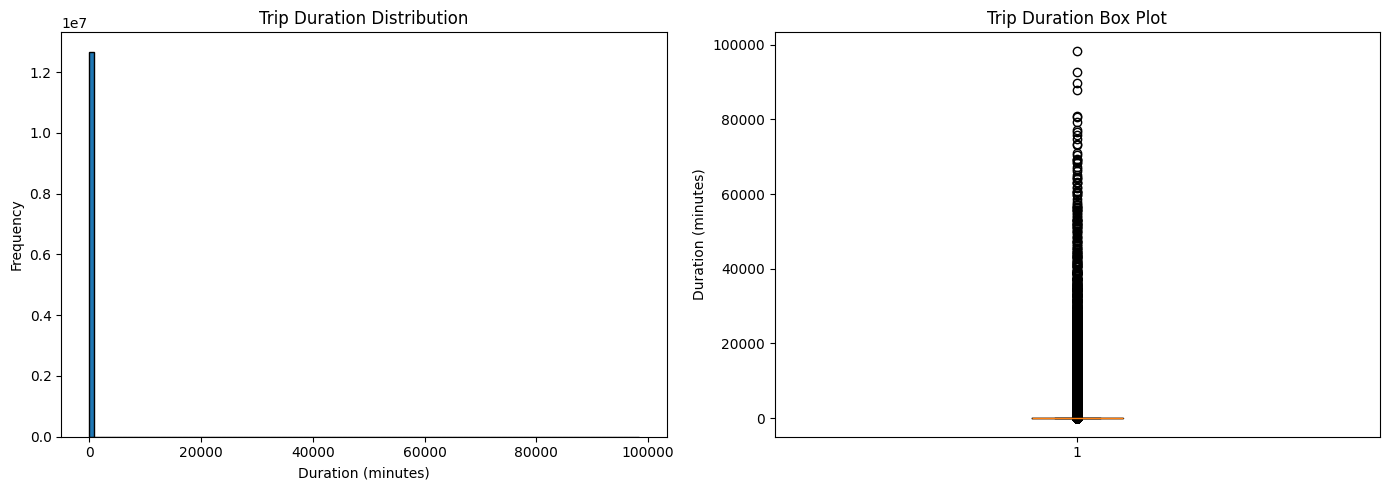

In [55]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(trips_post_2023["min_duration"], bins=100, edgecolor='black')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('Trip Duration Distribution')

# Box plot
ax2.boxplot(trips_post_2023["min_duration"])
ax2.set_ylabel('Duration (minutes)')
ax2.set_title('Trip Duration Box Plot')

plt.tight_layout()
plt.show()

Okay. We have huge outliers, so our plot is not telling us anything useful.

In [56]:
import numpy as np

stats = trips_post_2023["min_duration"].describe(percentiles=[0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995])
print(stats)

count    1.268020e+07
mean     1.862833e+01
std      2.571751e+02
min     -5.883173e+01
0.5%     1.183183e+00
1%       1.628567e+00
2%       2.196982e+00
5%       3.161800e+00
10%      4.233333e+00
25%      6.689100e+00
50%      1.116025e+01
75%      1.855000e+01
90%      2.939497e+01
95%      3.985568e+01
98%      6.280027e+01
99%      8.918333e+01
99.5%    1.192083e+02
max      9.838180e+04
Name: min_duration, dtype: float64


We can mean 18.6 minutes, median 11.1 minutes.

We have huge outliers that we can safely remove. We can also remove from the lower end trips made with same start and end station (probably redock becuase bike has troubles, etc).

In [57]:
trips_post_2023 = trips_post_2023[
    (trips_post_2023["min_duration"] >= 1) &  # Minimum realistic trip
    (trips_post_2023["min_duration"] <= 120)  # Maximum before likely error/theft/rebalancing
].copy()

# Optionally still remove same-station <3 min (false starts)
same_station = trips_post_2023["start_station_id"] == trips_post_2023["end_station_id"]
trips_post_2023 = trips_post_2023[~(same_station & (trips_post_2023["min_duration"] < 3))]

Lets check the statistics post cleaning

In [58]:
stats = trips_post_2023["min_duration"].describe(percentiles=[0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995])
print(stats)

count    1.251855e+07
mean     1.495869e+01
std      1.335598e+01
min      1.000000e+00
0.5%     1.668900e+00
1%       2.016667e+00
2%       2.468567e+00
5%       3.337983e+00
10%      4.350000e+00
25%      6.766367e+00
50%      1.119048e+01
75%      1.846838e+01
90%      2.894063e+01
95%      3.842351e+01
98%      5.628333e+01
99%      7.350761e+01
99.5%    8.978333e+01
max      1.200000e+02
Name: min_duration, dtype: float64


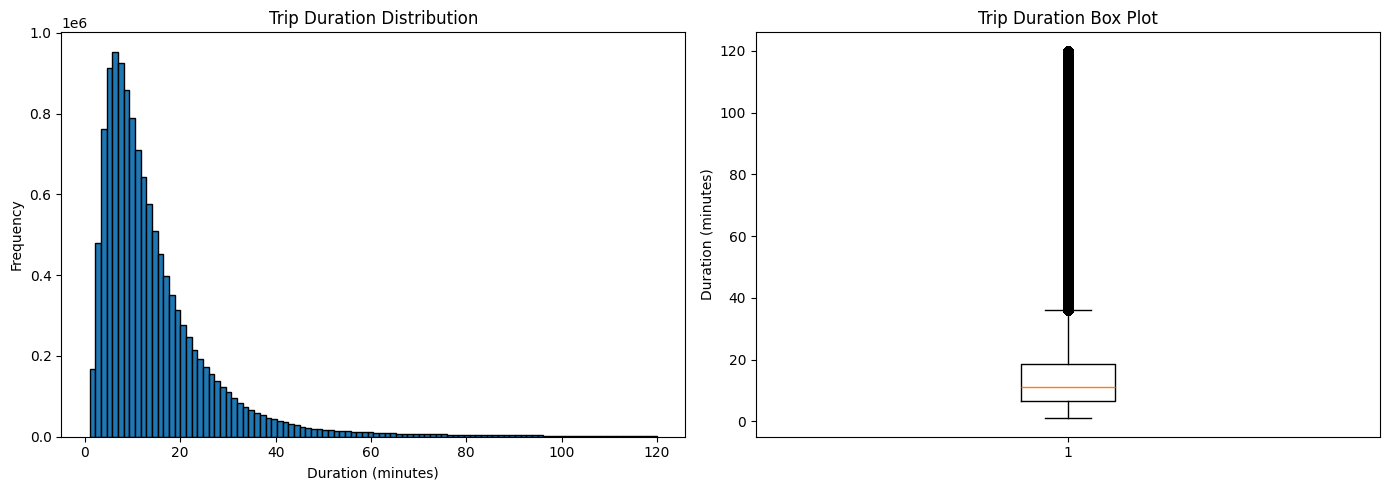

In [59]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(trips_post_2023["min_duration"], bins=100, edgecolor='black')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')
ax1.set_title('Trip Duration Distribution')

# Box plot
ax2.boxplot(trips_post_2023["min_duration"])
ax2.set_ylabel('Duration (minutes)')
ax2.set_title('Trip Duration Box Plot')

plt.tight_layout()
plt.show()

In [60]:
trips_post_2023.shape

(12518553, 11)

---

Now we can proceed to generate the aggregated datasets we need for analysis. We'll drop lat/lng from trips data since we have station metadata separately.

**Datasets to generate:**

1. **System-wide daily aggregates (2018-present)**: Total trips per day for trend and seasonal analysis.

2. **Station-level hourly aggregates (2023-present)**: Pickups and dropoffs per station per hour for our stations of interest.

We'll manually define our area of interest (station IDs) and generate only the aggregated datasets needed for modeling. The raw trip records can be archived once aggregation is complete.

Our EDA ends up here. The whole cleaning phase will be done in a new task as part of the bluebikes_analysis pipeline for reproductibility. At the bottom we leave the stations pertaining to our area of interest.

---

Note: we still did not filtered by time in old trips. We should do that first in the corresponding task.

On emore check: is member_casual really a binary variable? For post 2023.

In [62]:
trips_post_2023["member_casual"].value_counts()

member_casual
member    9012213
casual    3506340
Name: count, dtype: int64